<a href="https://colab.research.google.com/github/ajay8466/OIBSIP/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras

In [ ]:
df=pd.read_csv("/content/archive (3).zip")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [ ]:
labels = pd.get_dummies(df.category)
labels.columns = ["negative", "neutral", "positive"]
labels.head()

,negative,neutral,positive
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


<Axes: xlabel='category', ylabel='count'>

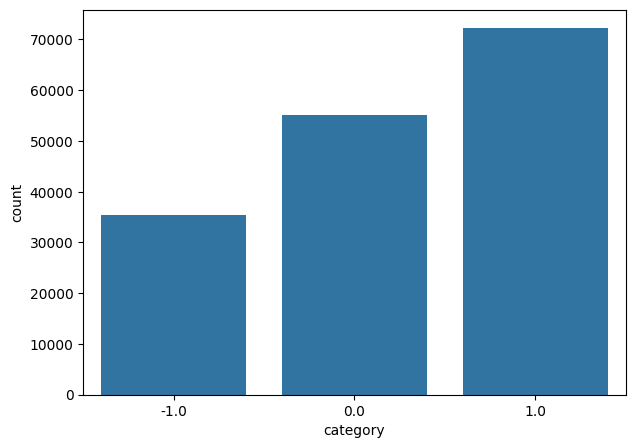

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,5))
sns.countplot(x="category",data=df)

Text(0.5, 1.0, 'Distribution of sentiments')

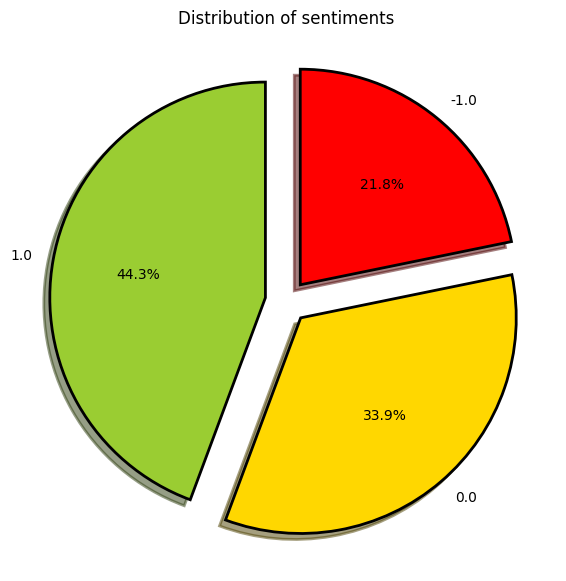

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['category'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

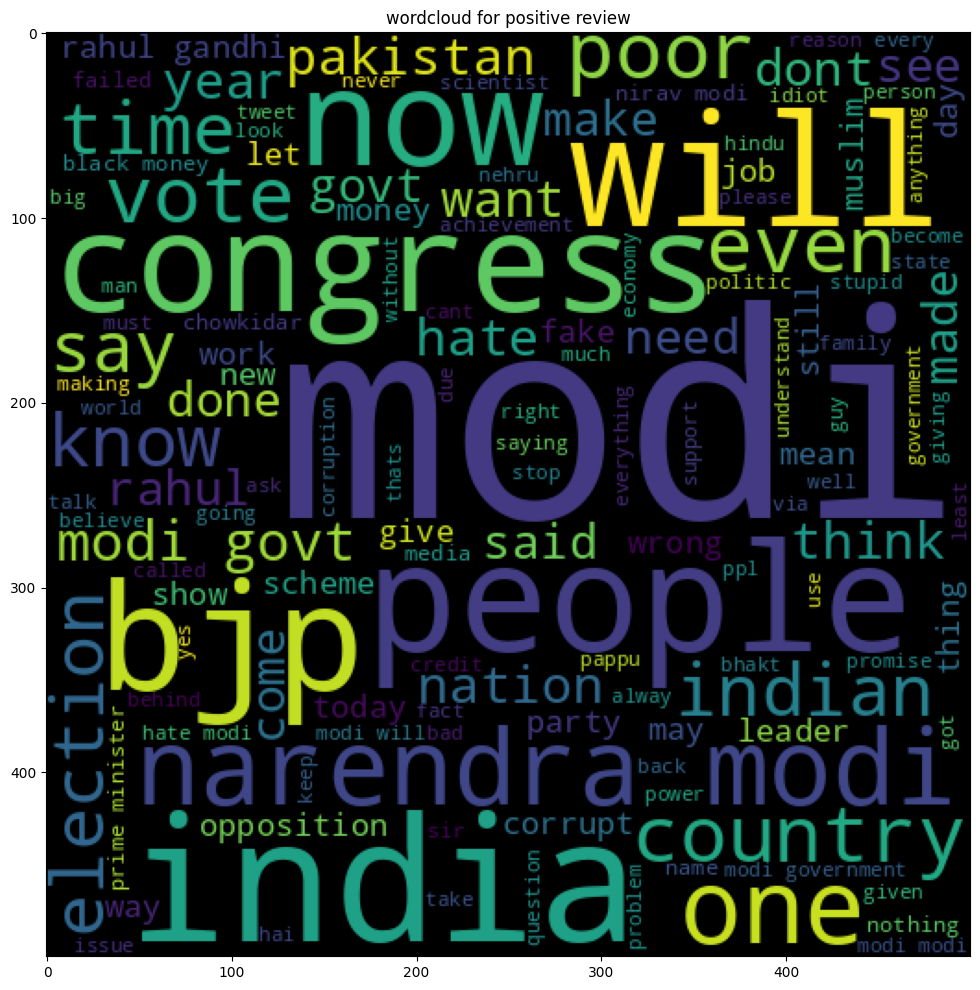

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
positive_wc = wc.generate(df[df['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(df[df['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(df[df['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.title('wordcloud for positive review')
plt.imshow(positive_wc)

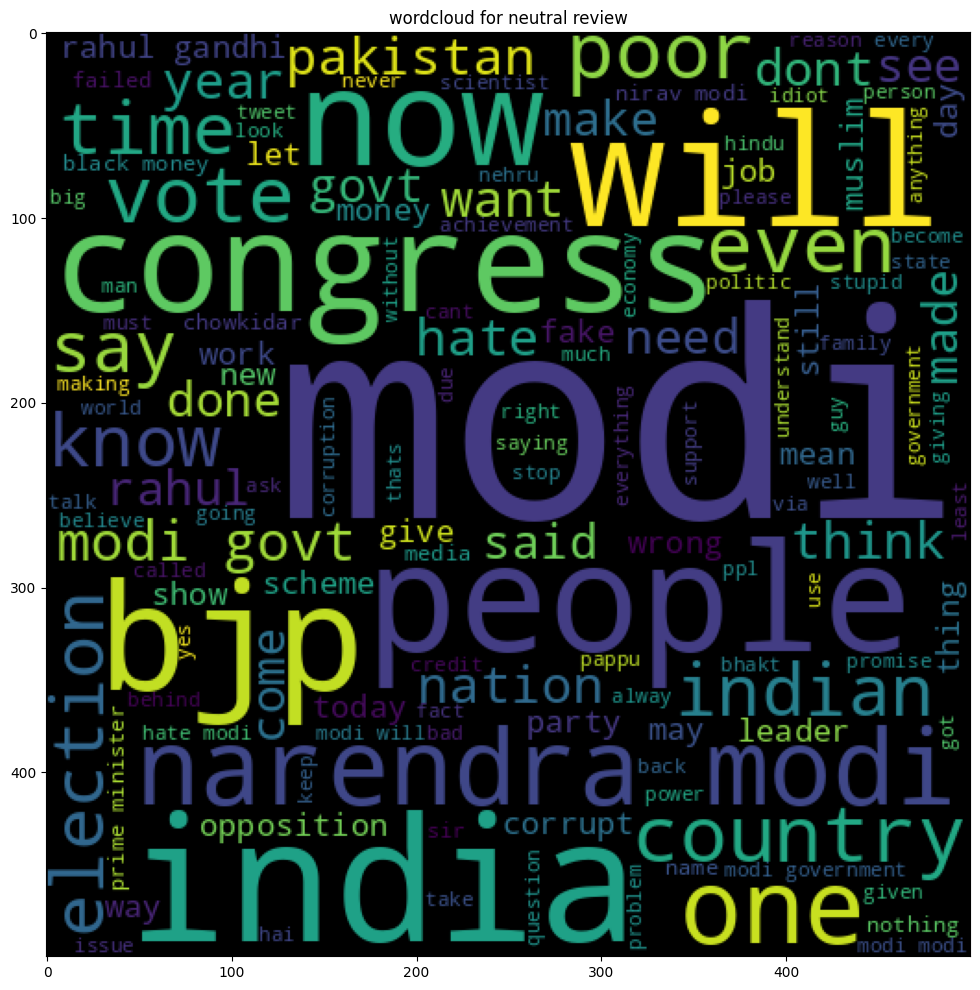

In [ ]:
plt.figure(figsize = (12, 12))
plt.title('wordcloud for neutral review')
plt.imshow(neutral_wc)

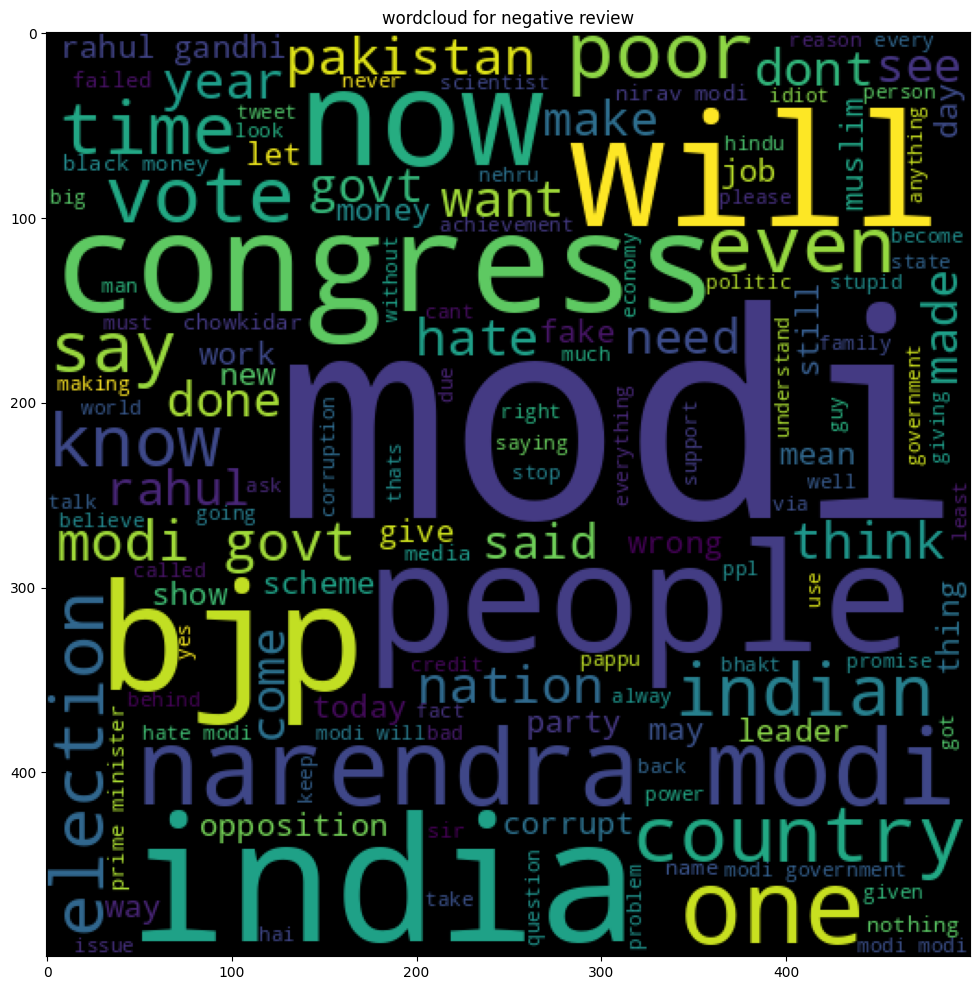

In [ ]:
plt.figure(figsize = (12, 12))
plt.title('wordcloud for negative review')
plt.imshow(negative_wc)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay

In [ ]:
X = df['clean_text'].values.astype('U')
y = df['category'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [ ]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True, stop_words = 'english',analyzer = 'word')), ('naive_bayes', MultinomialNB())])
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
pipe['naive_bayes']

[[ 1411    56    48     0]
 [  438  5622   551     0]
 [ 8804 10886 21076     2]
 [    0     0     0     0]]
0.5748967153433959


MultinomialNB()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences)
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_padded, labels, test_size=0.3, stratify=labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_padded.shape[1]),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1427/1427 [==============================] - 55s 36ms/step - loss: 0.3270 - accuracy: 0.8806 - val_loss: 0.1528 - val_accuracy: 0.9560
Epoch 2/5
1427/1427 [==============================] - 18s 13ms/step - loss: 0.1020 - accuracy: 0.9685 - val_loss: 0.1132 - val_accuracy: 0.9660
Epoch 3/5
1427/1427 [==============================] - 15s 11ms/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.1252 - val_accuracy: 0.9618
Epoch 4/5
1427/1427 [==============================] - 14s 10ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.1272 - val_accuracy: 0.9647
Epoch 5/5
1427/1427 [==============================] - 14s 10ms/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.1437 - val_accuracy: 0.9639


In [ ]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1528/1528 [==============================] - 7s 5ms/step - loss: 0.1526 - accuracy: 0.9623
Test Loss: 0.1525900959968567, Test Accuracy: 0.9622653126716614


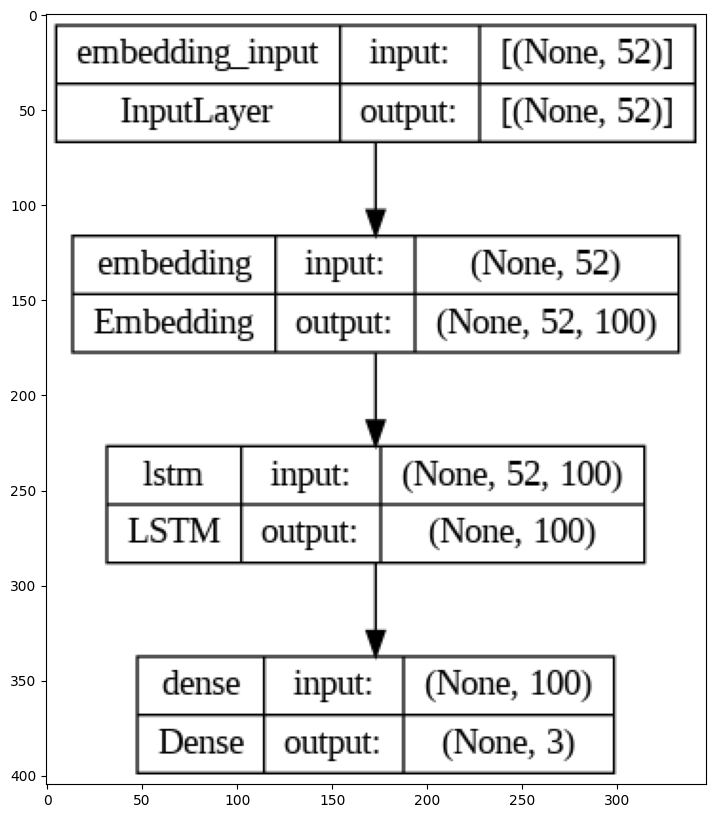

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
img = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()